# 1. MCP 이해

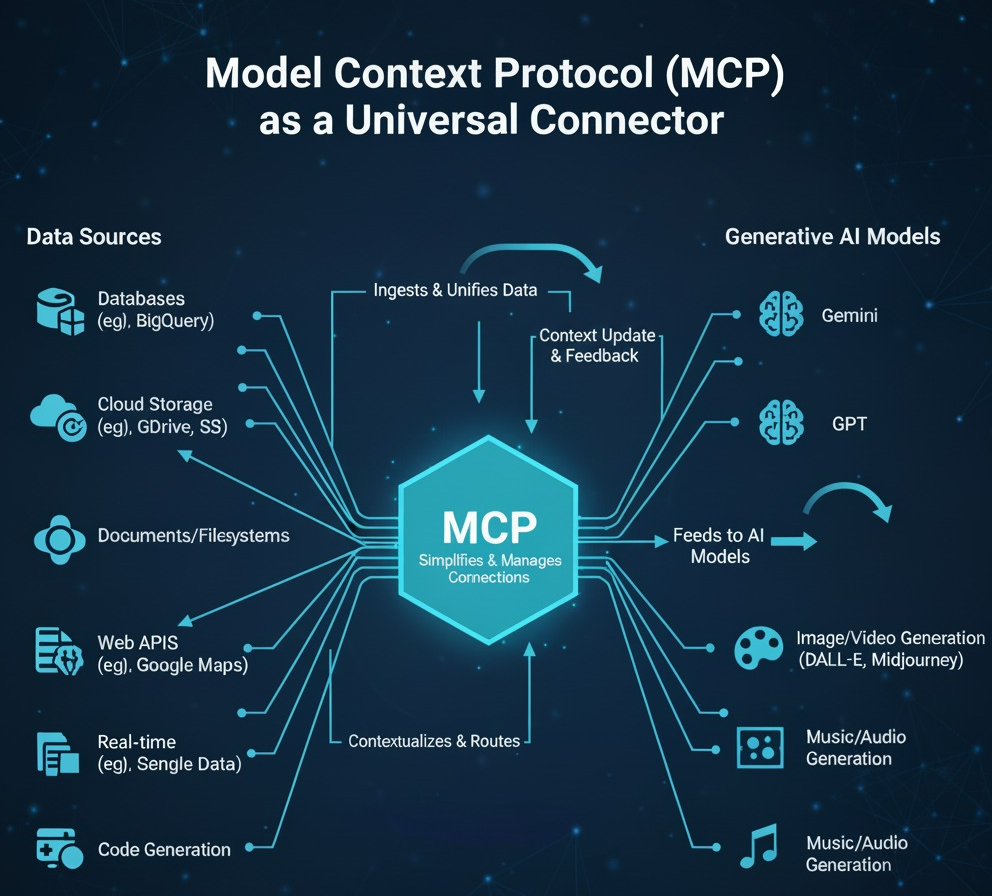

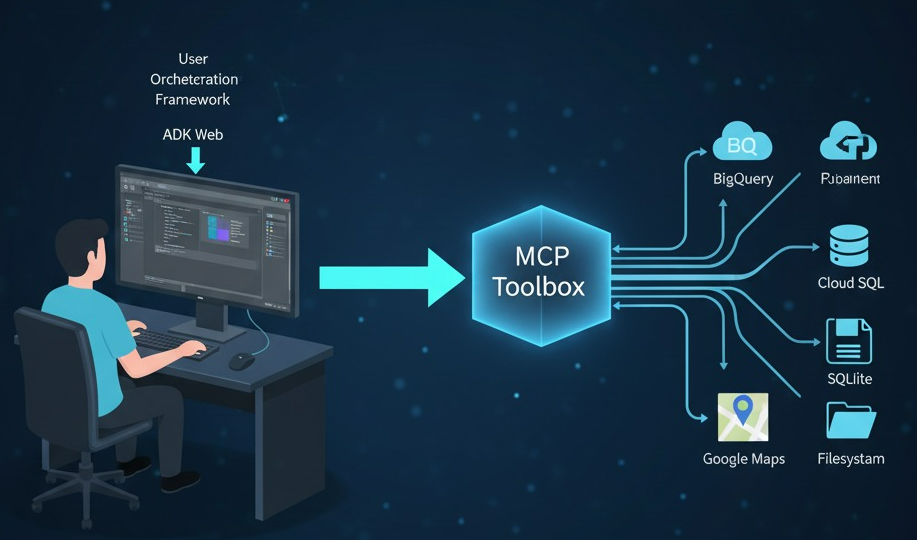

# 2. MCP와의 연동

## 2.1 MCPToolset 구조 이해

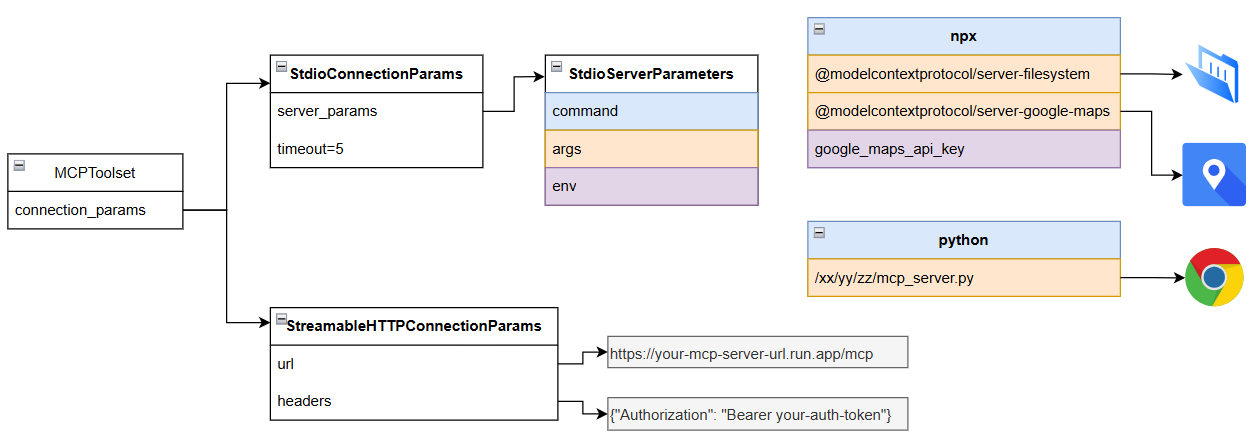

## 2.2 file manage 구조 이해

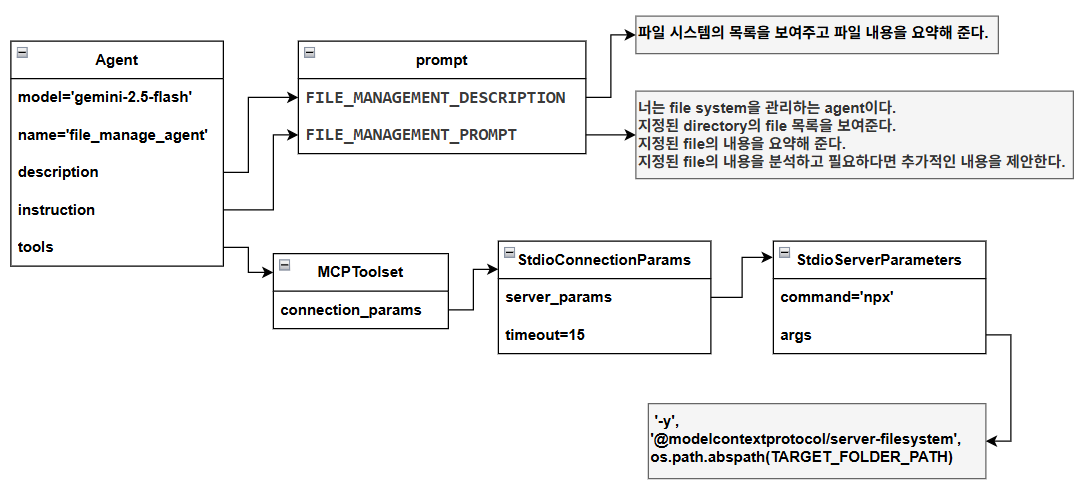

## 2.3 server filesystem 구조

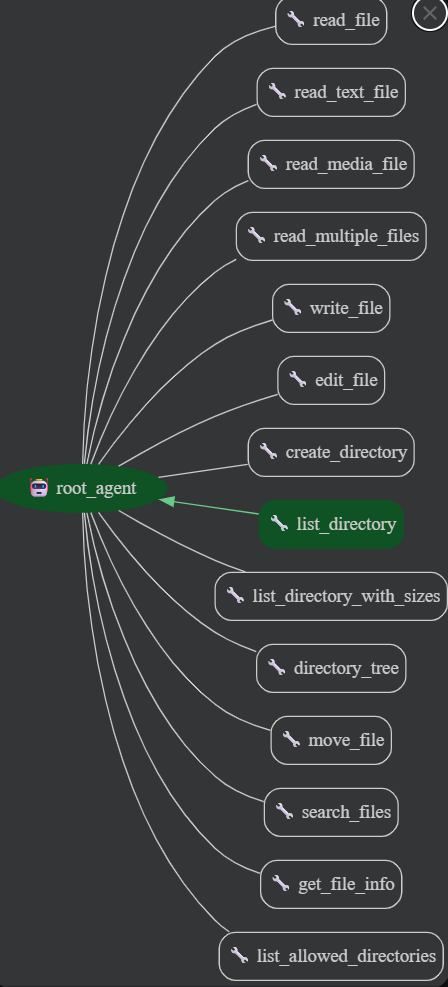

## 2.4 file manage adk 만들기

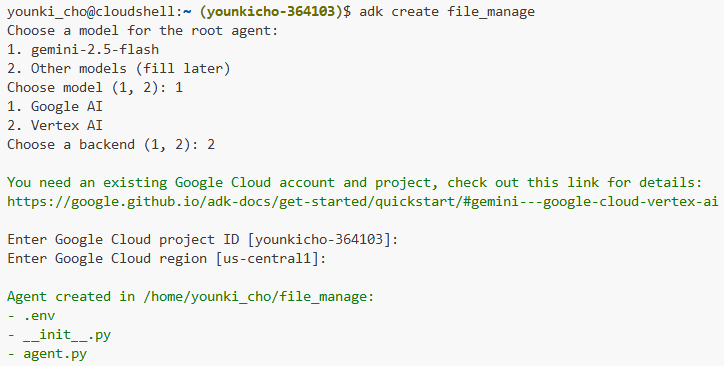

# 3. 실행

## 3.1 adk web 실행

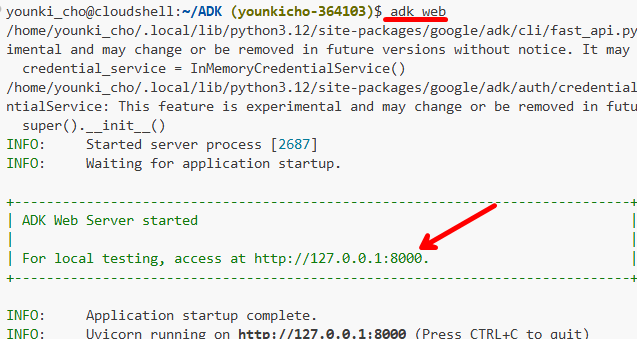

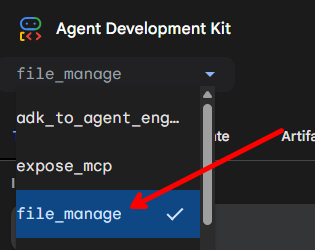

## 3.2 목록 확인

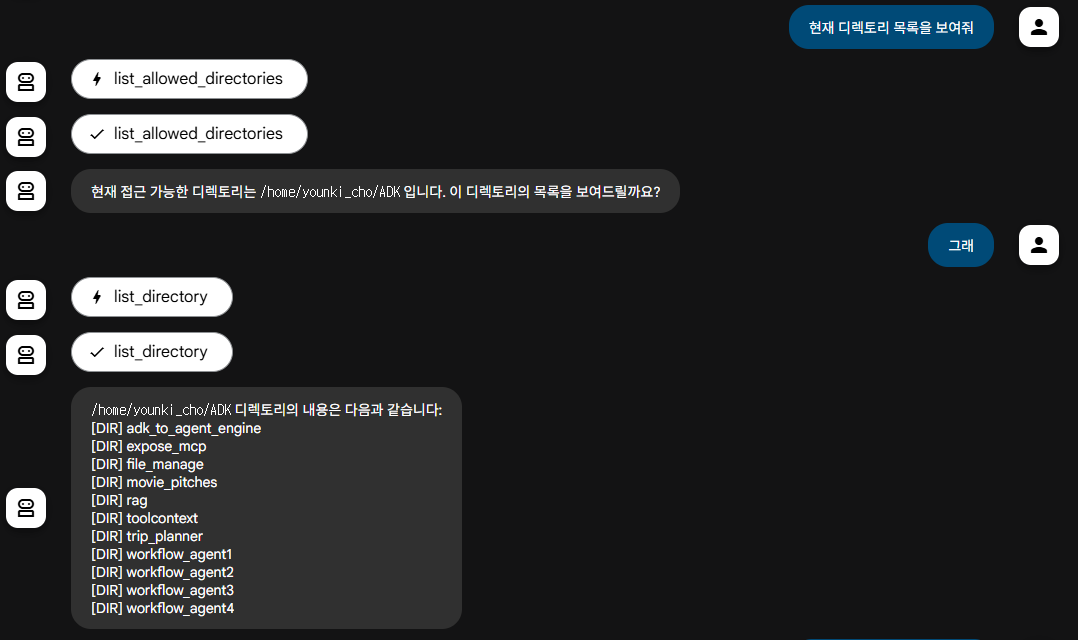

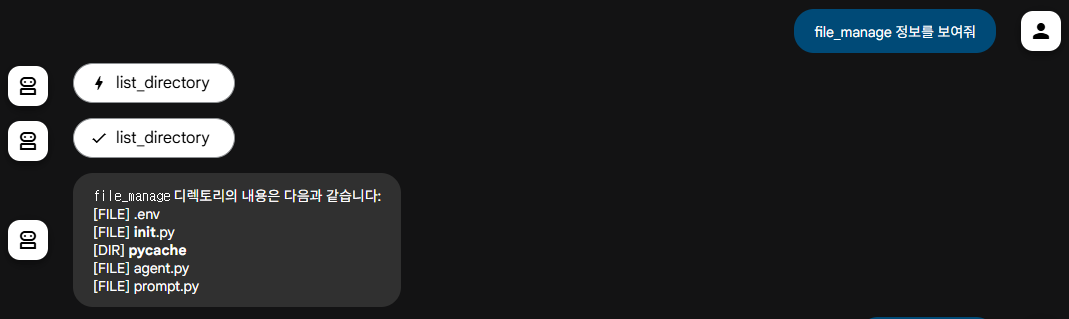

## 3.3 파일 확인

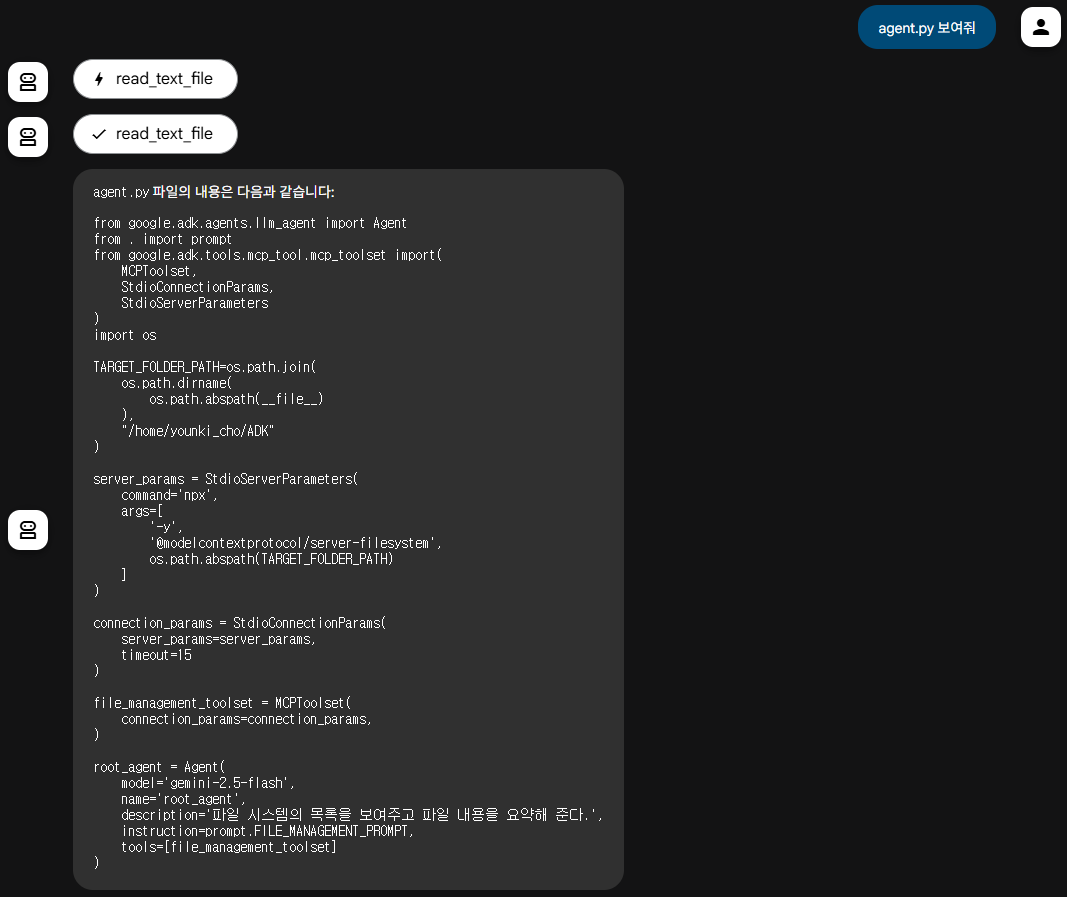

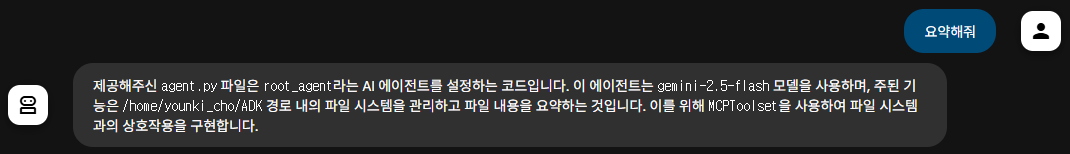

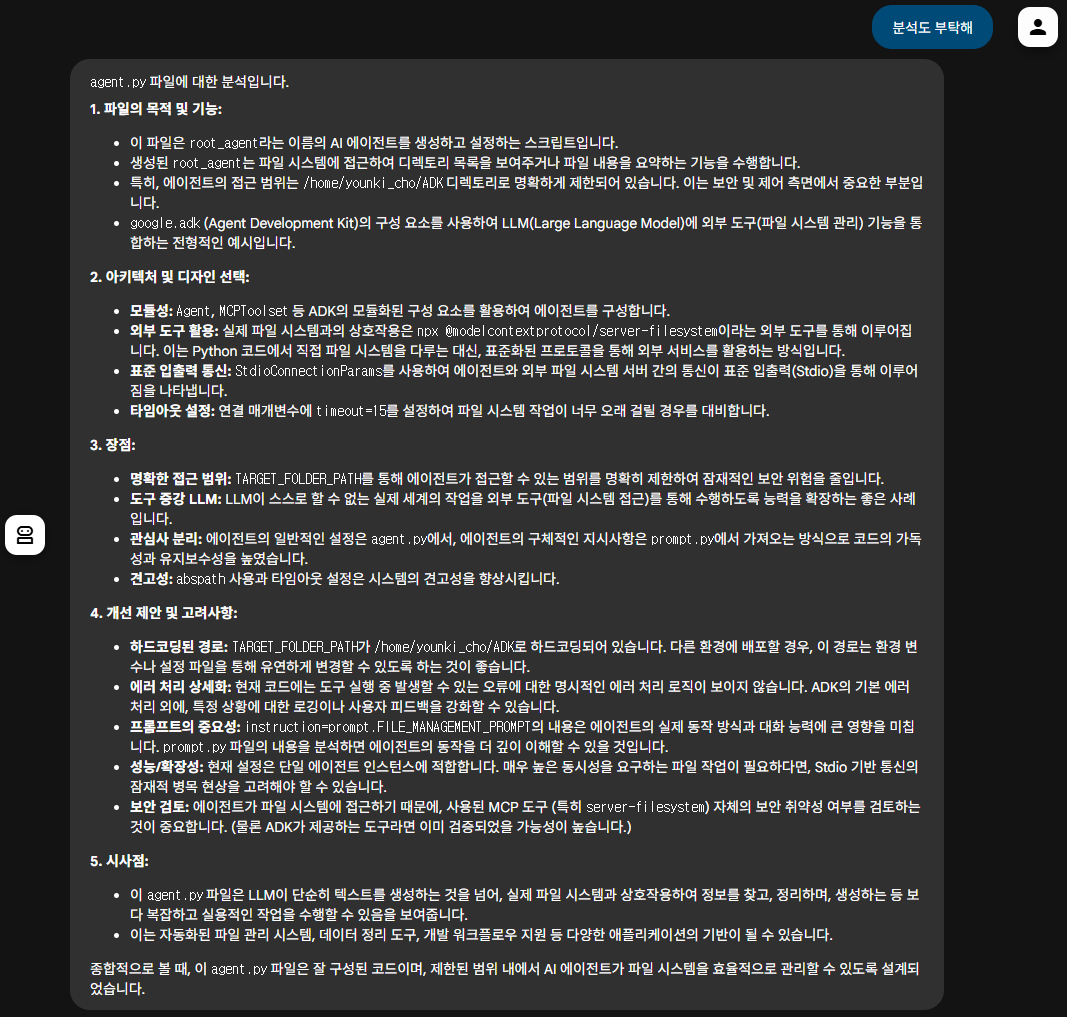

## 3.4 파일 생성

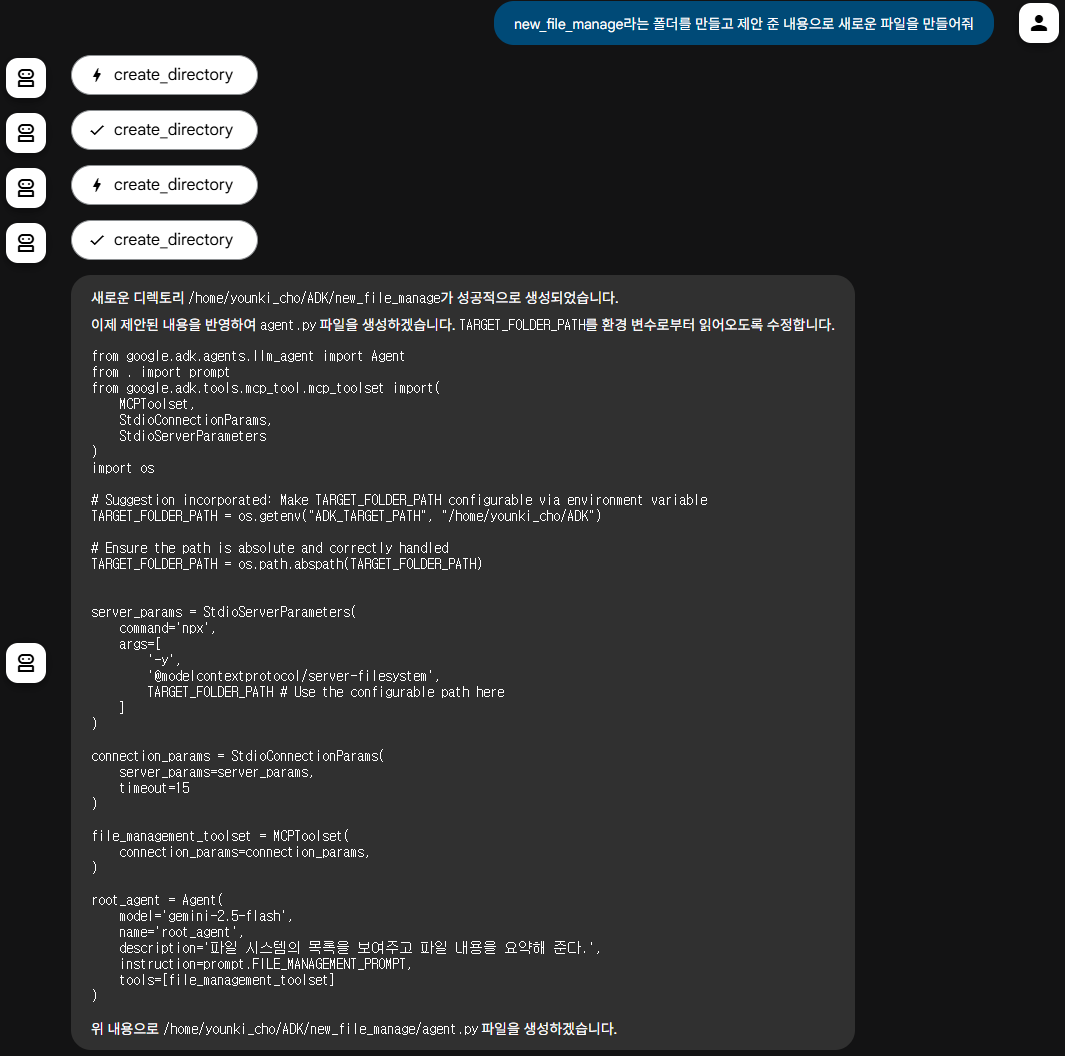

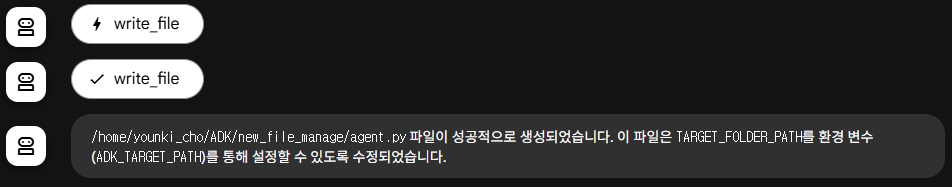

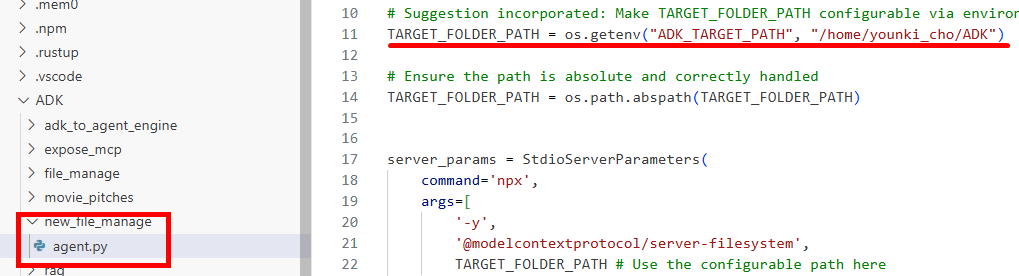

## 4. code

## 4.1 agent.py

In [ ]:
from google.adk.agents.llm_agent import Agent
from . import prompt
from google.adk.tools.mcp_tool.mcp_toolset import(
    MCPToolset,
    StdioConnectionParams,
    StdioServerParameters
)
import os

TARGET_FOLDER_PATH=os.path.join(
    os.path.dirname(
        os.path.abspath(__file__)
    ),
    "/home/younki_cho/ADK"
)

server_params = StdioServerParameters(
    command='npx',
    args=[
        '-y',
        '@modelcontextprotocol/server-filesystem',
        os.path.abspath(TARGET_FOLDER_PATH)
    ]
)

connection_params = StdioConnectionParams(
    server_params=server_params,
    timeout=15
)

file_management_toolset = MCPToolset(
    connection_params=connection_params,
)

root_agent = Agent(
    model='gemini-2.5-flash',
    name='root_agent',
    description=prompt.FILE_MANAGEMENT_DESCRIPTION,
    instruction=prompt.FILE_MANAGEMENT_PROMPT,
    tools=[file_management_toolset]
)

## 4.2 prompt.py

In [ ]:
# 파일 관리 agent에서 사용할 prompt

FILE_MANAGEMENT_DESCRIPTION="""
파일 시스템의 목록을 보여주고 파일 내용을 요약해 준다.
"""

FILE_MANAGEMENT_PROMPT="""
너는 file system을 관리하는 agent이다.
지정된 directory의 file 목록을 보여준다.
지정된 file의 내용을 요약해 준다.
지정된 file의 내용을 분석하고 필요하다면 추가적인 내용을 제안한다.
"""

# 5. 참조

- https://google.github.io/adk-docs/tools/mcp-tools/